In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('US-pumpkins.csv')
df.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [5]:
from sklearn.preprocessing import LabelEncoder
new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']
new_df = df.drop([c for c in df.columns if c not in new_columns],axis=1)
new_df.dropna(inplace=True)
new_df = new_df.apply(LabelEncoder().fit_transform)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 2 to 1698
Data columns (total 6 columns):
City Name    991 non-null int32
Package      991 non-null int32
Variety      991 non-null int32
Origin       991 non-null int32
Item Size    991 non-null int32
Color        991 non-null int32
dtypes: int32(6)
memory usage: 31.0 KB


In [6]:
new_df.head()

,City Name,Package,Variety,Origin,Item Size,Color
2,1,3,4,3,3,0
3,1,3,4,17,3,0
4,1,3,4,5,2,0
5,1,3,4,5,2,0
6,1,4,4,5,3,0


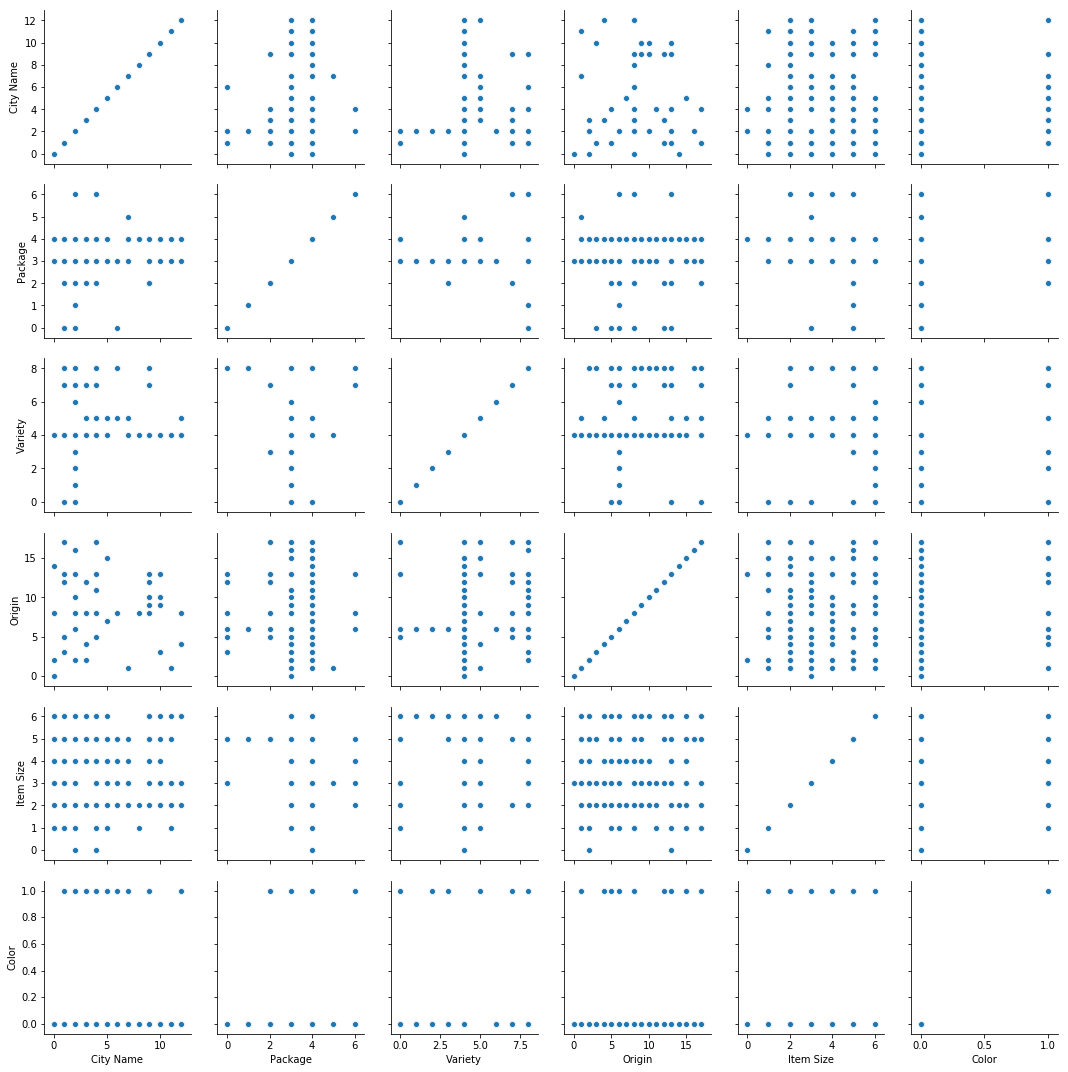

In [8]:
import seaborn as sns
g = sns.PairGrid(new_df)
g.map(sns.scatterplot)

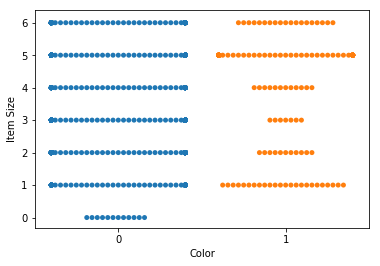

In [9]:
sns.swarmplot(x='Color',y='Item Size', data=new_pumpkins)

C:\Users\BALA ABDULJALIL\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


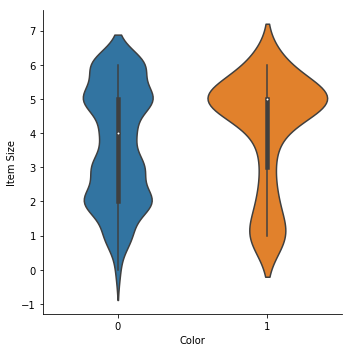

In [10]:
sns.catplot(x='Color',y='Item Size',kind='violin',data=new_pumpkins)

In [11]:
from sklearn.model_selection import train_test_split
selected_features = ['Origin','Item Size','Variety','City Name','Package']
X = new_pumpkins[selected_features]
y = new_pumpkins['Color']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print(f'Classification report: \n {classification_report(y_test,predictions)}')
print(f'Predicted labels: {predictions}')
print(f'Accurary: {accuracy_score(y_test,predictions):3.3}')

Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

   micro avg       0.81      0.81      0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accurary: 0.814


C:\Users\BALA ABDULJALIL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[162,   4],
       [ 33,   0]], dtype=int64)

C:\Users\BALA ABDULJALIL\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


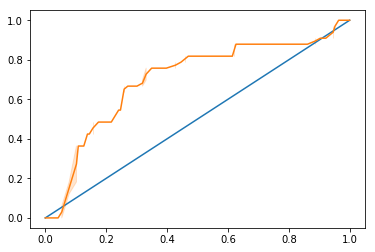

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
y_scores = model.predict_proba(X_test)
# calculate the roc curve
fpr,tpr,thresholds = roc_curve(y_test,y_scores[:,1])
sns.lineplot(x=[0,1],y =[0,1])
sns.lineplot(x =fpr,y= tpr)

In [15]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6997079225994889
